<a href="https://colab.research.google.com/github/poojitharajapuram/ML-HW4/blob/main/HW4_INTRO_TO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [88]:
url = 'https://raw.githubusercontent.com/poojitharajapuram/ML-HW4/main/cancer.csv'
data = pd.read_csv(url)
removed_column = data.pop('diagnosis')
data.pop('Unnamed: 32')
Y = pd.DataFrame({'diagnosis': removed_column})
X = data

In [90]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics


if isinstance(Y, pd.Series) or isinstance(Y, pd.DataFrame):
    Y = Y.values.ravel()

# Initialize the StandardScaler
sc = StandardScaler()

# Standardize the features
X_std = sc.fit_transform(X)

n = X_std.shape[1]

# Lists to hold performance metrics for each value of k
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []

# Loop over the range of number of components to use with PCA
for i in range(n):
    k = i + 1
    print(f"K = {k}")

    # Apply PCA
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X_std)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)

    # Initialize and train the classifier with a linear kernel
    classifier = SVC(kernel='linear', C=10)
    classifier.fit(X_train, y_train)

    # Predict on the test set
    Y_pred = classifier.predict(X_test)


    positive_label = 'M'
    # Calculate and print performance metrics
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label=positive_label)
    rec = metrics.recall_score(y_test, Y_pred, pos_label=positive_label)
    fscore = metrics.f1_score(y_test, Y_pred, pos_label=positive_label)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {fscore:.4f}")

    # Store the metrics in their respective lists
    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(k)

# Find the highest accuracy and the corresponding K value
high_acc = max(acc_list)
high_acc_k = k_list[acc_list.index(high_acc)]

# Output the highest accuracy and corresponding K
print("----------------")
print(f"Highest Classification Accuracy Achieved using a linear kernel: {high_acc:.2f}% for K number = {high_acc_k}")


K = 1
Accuracy: 0.9035
Precision: 0.8750
Recall: 0.8936
F1-Score: 0.8842
K = 2
Accuracy: 0.9211
Precision: 0.8800
Recall: 0.9362
F1-Score: 0.9072
K = 3
Accuracy: 0.9211
Precision: 0.8800
Recall: 0.9362
F1-Score: 0.9072
K = 4
Accuracy: 0.9474
Precision: 0.9362
Recall: 0.9362
F1-Score: 0.9362
K = 5
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
K = 6
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
K = 7
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
K = 8
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
K = 9
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
K = 10
Accuracy: 0.9386
Precision: 0.9167
Recall: 0.9362
F1-Score: 0.9263
K = 11
Accuracy: 0.9386
Precision: 0.9167
Recall: 0.9362
F1-Score: 0.9263
K = 12
Accuracy: 0.9474
Precision: 0.9184
Recall: 0.9574
F1-Score: 0.9375
K = 13
Accuracy: 0.9474
Precision: 0.9184
Recall: 0.9574
F1-Score: 0.9375
K = 14
Accuracy: 0.9474
Precision: 0.9184
Recal

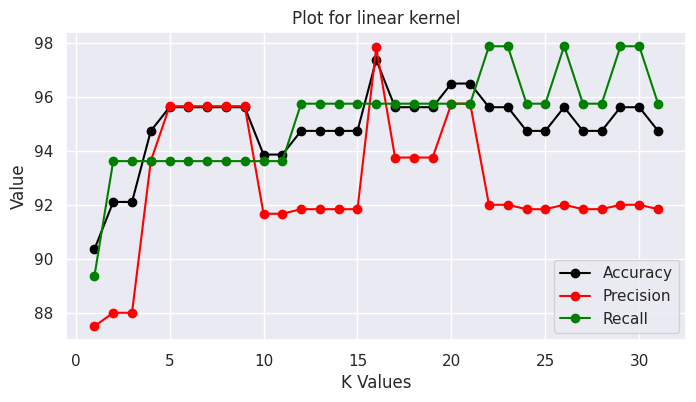

In [63]:
plt.figure(figsize=(8, 4))

plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')

plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')

plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [93]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics


n = X_std.shape[1]
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []
for i in range(n):
    k = i + 1
    print(f"K = {k}")
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)

    classifier = SVC(kernel='poly', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)

    try:
        pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
        rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
        fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")
    except ValueError:
        pre, rec, fscore = 0, 0, 0

    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {pre:.2%}")
    print(f"Recall: {rec:.2%}")
    print(f"F1-Score: {fscore:.2%}")

    acc_list.append(acc * 100)
    precision_list.append(pre * 100)
    recall_list.append(rec * 100)
    f1score_list.append(fscore * 100)
    k_list.append(k)

high_acc = max(acc_list)
high_acc_k = k_list[acc_list.index(high_acc)]
print("----------------")
print(f"Highest Classification Accuracy Achieved using polynomial kernel: {high_acc:.2f}% for K number = {high_acc_k}")


K = 1
Accuracy: 85.96%
Precision: 100.00%
Recall: 65.96%
F1-Score: 79.49%
K = 2
Accuracy: 92.98%
Precision: 97.56%
Recall: 85.11%
F1-Score: 90.91%
K = 3
Accuracy: 92.98%
Precision: 100.00%
Recall: 82.98%
F1-Score: 90.70%
K = 4
Accuracy: 94.74%
Precision: 95.56%
Recall: 91.49%
F1-Score: 93.48%
K = 5
Accuracy: 96.49%
Precision: 97.78%
Recall: 93.62%
F1-Score: 95.65%
K = 6
Accuracy: 97.37%
Precision: 100.00%
Recall: 93.62%
F1-Score: 96.70%
K = 7
Accuracy: 97.37%
Precision: 100.00%
Recall: 93.62%
F1-Score: 96.70%
K = 8
Accuracy: 97.37%
Precision: 100.00%
Recall: 93.62%
F1-Score: 96.70%
K = 9
Accuracy: 98.25%
Precision: 100.00%
Recall: 95.74%
F1-Score: 97.83%
K = 10
Accuracy: 98.25%
Precision: 100.00%
Recall: 95.74%
F1-Score: 97.83%
K = 11
Accuracy: 98.25%
Precision: 100.00%
Recall: 95.74%
F1-Score: 97.83%
K = 12
Accuracy: 98.25%
Precision: 100.00%
Recall: 95.74%
F1-Score: 97.83%
K = 13
Accuracy: 97.37%
Precision: 97.83%
Recall: 95.74%
F1-Score: 96.77%
K = 14
Accuracy: 97.37%
Precision: 100

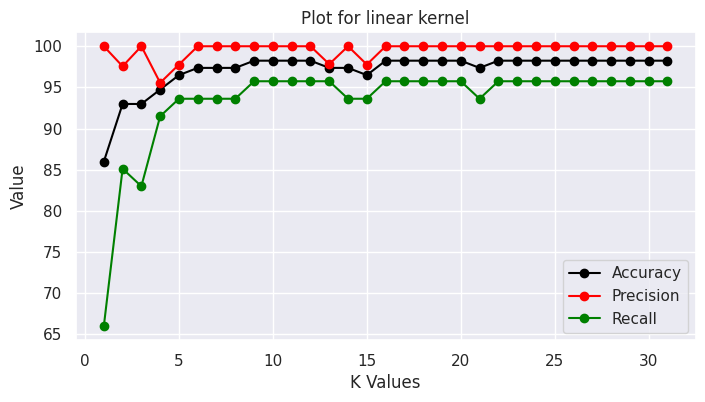

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')

plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')

plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [94]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics



n = X_std.shape[1]  # Number of features, could also be set to a specific number

# Lists to hold performance metrics for each number of principal components
performance_metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1score': [],
    'k': []
}

# Find the best performing number of components based on accuracy
best_performance = {'accuracy': 0, 'k': 0}

for i in range(n):
    k = i + 1
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)

    classifier = SVC(kernel='rbf', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = metrics.accuracy_score(y_test, Y_pred)
    precision = metrics.precision_score(y_test, Y_pred, pos_label="M")
    recall = metrics.recall_score(y_test, Y_pred, pos_label="M")
    f1score = metrics.f1_score(y_test, Y_pred, pos_label="M")

    # Print performance metrics
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, "
          f"Recall = {recall:.4f}, F1-Score = {f1score:.4f}")

    # Append metrics to the lists
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1score'].append(f1score)
    performance_metrics['k'].append(k)

    # Update best performance if current accuracy is higher
    if accuracy > best_performance['accuracy']:
        best_performance['accuracy'] = accuracy
        best_performance['k'] = k

# Print the highest accuracy and corresponding number of principal components
print("----------------")
print(f"Highest Classification Accuracy using RBF kernel: {best_performance['accuracy']:.2%} "
      f"for K number = {best_performance['k']}")


K = 1: Accuracy = 0.8947, Precision = 0.8571, Recall = 0.8936, F1-Score = 0.8750
K = 2: Accuracy = 0.9035, Precision = 0.8600, Recall = 0.9149, F1-Score = 0.8866
K = 3: Accuracy = 0.9298, Precision = 0.9149, Recall = 0.9149, F1-Score = 0.9149
K = 4: Accuracy = 0.9474, Precision = 0.9362, Recall = 0.9362, F1-Score = 0.9362
K = 5: Accuracy = 0.9561, Precision = 0.9565, Recall = 0.9362, F1-Score = 0.9462
K = 6: Accuracy = 0.9649, Precision = 0.9778, Recall = 0.9362, F1-Score = 0.9565
K = 7: Accuracy = 0.9737, Precision = 1.0000, Recall = 0.9362, F1-Score = 0.9670
K = 8: Accuracy = 0.9825, Precision = 1.0000, Recall = 0.9574, F1-Score = 0.9783
K = 9: Accuracy = 0.9912, Precision = 1.0000, Recall = 0.9787, F1-Score = 0.9892
K = 10: Accuracy = 0.9912, Precision = 1.0000, Recall = 0.9787, F1-Score = 0.9892
K = 11: Accuracy = 0.9825, Precision = 1.0000, Recall = 0.9574, F1-Score = 0.9783
K = 12: Accuracy = 0.9912, Precision = 1.0000, Recall = 0.9787, F1-Score = 0.9892
K = 13: Accuracy = 0.9912

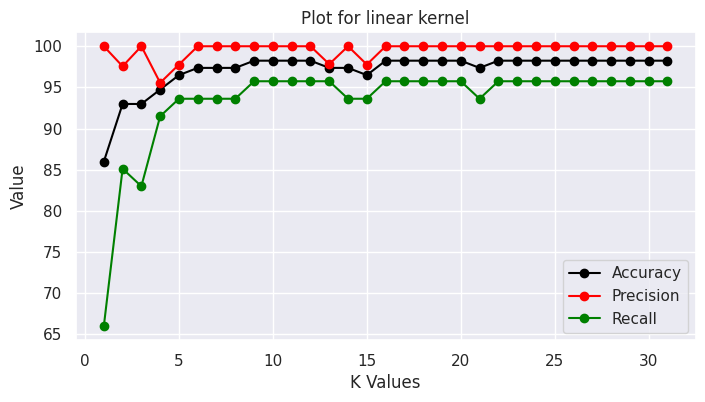

In [66]:
plt.figure(figsize=(8, 4))


plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')


plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')


plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Problem 2

In [96]:
url = 'https://raw.githubusercontent.com/poojitharajapuram/ML-HW4/main/Housing.csv'
House_data = pd.read_csv(url)

In [97]:
def preprocess(data,variables):
  updated_data = data[variables].replace({'yes':1,'no':0})
  x = updated_data.iloc[:,1:]
  m = x.shape[0]
  y = np.array(updated_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))
  return x,y

In [98]:
from sklearn.preprocessing import MinMaxScaler
variable = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X,y = preprocess(House_data,variable)
sc = MinMaxScaler()
X_std = sc.fit_transform(X)

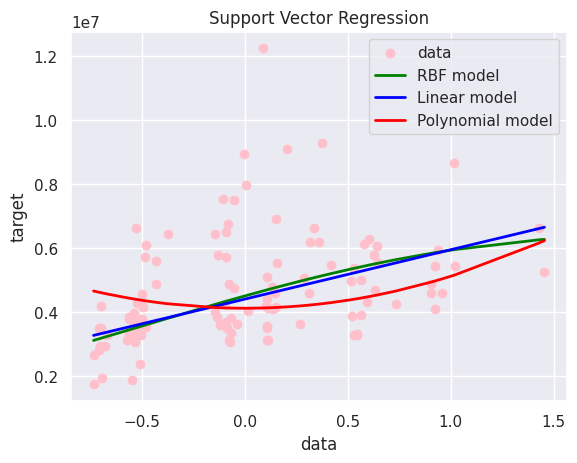

In [99]:
y_rbf = SVR(kernel='rbf', C=3e6, gamma=0.1)
y_lin = SVR(kernel='linear', C=2e5)
y_poly = SVR(kernel='poly', C=5e6, degree=2)
n_components = 1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_std)
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(principalComponents, y, test_size = 0.20, random_state = 0)
pred_rbf = y_rbf.fit(X_trainset, Y_trainset.ravel()).predict(X_testset)
pred_lin = y_lin.fit(X_trainset, Y_trainset.ravel()).predict(X_testset)
pred_poly = y_poly.fit(X_trainset, Y_trainset.ravel()).predict(X_testset)
sort_order = np.argsort(X_testset.ravel())
X_testset = X_testset[sort_order].ravel()
lw = 2
plt.scatter(X_testset, Y_testset[sort_order].ravel(), color='pink', label='data')
plt.plot(X_testset, pred_rbf[sort_order].ravel(), color='green', lw=lw, label='RBF model')
plt.plot(X_testset, pred_lin[sort_order].ravel(), color='blue', lw=lw, label='Linear model')
plt.plot(X_testset, pred_poly[sort_order].ravel(), color='red', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [100]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



n = X_std.shape[1]
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None

# Iterate over possible numbers of principal components
for k in range(1, n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.20, random_state=0)

    # Fit the SVR model
    svr_lin = SVR(kernel='linear', C=2e5)
    svr_lin.fit(X_train, y_train.ravel())
    y_pred = svr_lin.predict(X_test)

    # Calculate RMSE and R2 score
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)

    # Check for the best RMSE and corresponding R2 and k
    if rmse < best_rmse:
        best_rmse, best_r2, best_k = rmse, r2, k

    # Print the RMSE and R2 for each k
    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

# Print the best values
print("\nLinear kernel")
print(f"Best K value is: {best_k}")
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2 (K={best_k}): {best_r2:.2f}')


K=1: RMSE = 1607985.34, R2 = 0.10
K=2: RMSE = 1341873.86, R2 = 0.38
K=3: RMSE = 1360158.03, R2 = 0.36
K=4: RMSE = 1319655.91, R2 = 0.40
K=5: RMSE = 1357628.15, R2 = 0.36
K=6: RMSE = 1170199.18, R2 = 0.52
K=7: RMSE = 1143340.00, R2 = 0.55
K=8: RMSE = 1145924.56, R2 = 0.54
K=9: RMSE = 1061108.34, R2 = 0.61
K=10: RMSE = 1041682.42, R2 = 0.62
K=11: RMSE = 1009279.75, R2 = 0.65

Linear kernel
Best K value is: 11
Best RMSE (K=11): 1009279.75
Corresponding Best R2 (K=11): 0.65


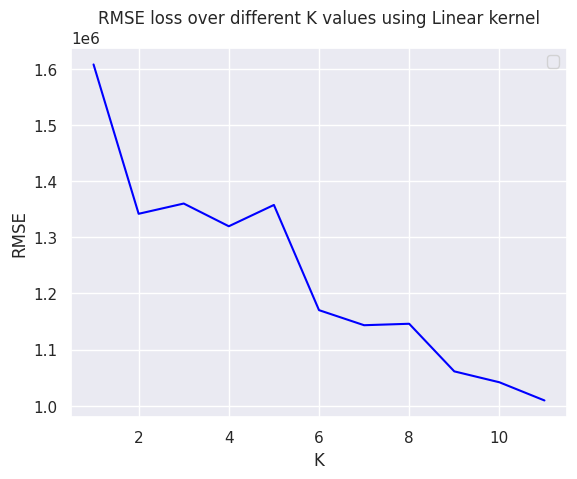

In [101]:
plt.plot(range(1,n), rmse_list, color='blue')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Linear kernel')
plt.legend()
plt.show()

K=1: RMSE = 1765331.32, R2 = -0.08
K=2: RMSE = 1400402.08, R2 = 0.32
K=3: RMSE = 1406861.09, R2 = 0.31
K=4: RMSE = 1340587.82, R2 = 0.38
K=5: RMSE = 1352282.99, R2 = 0.37
K=6: RMSE = 1320588.54, R2 = 0.39
K=7: RMSE = 1358996.45, R2 = 0.36
K=8: RMSE = 1526250.55, R2 = 0.19
K=9: RMSE = 1456280.15, R2 = 0.26
K=10: RMSE = 1442979.28, R2 = 0.28
K=11: RMSE = 1325907.49, R2 = 0.39

Polynomial kernel
Best K value is: 6
Best RMSE (K=6): 1320588.54
Corresponding Best R2 (K=6): 0.39


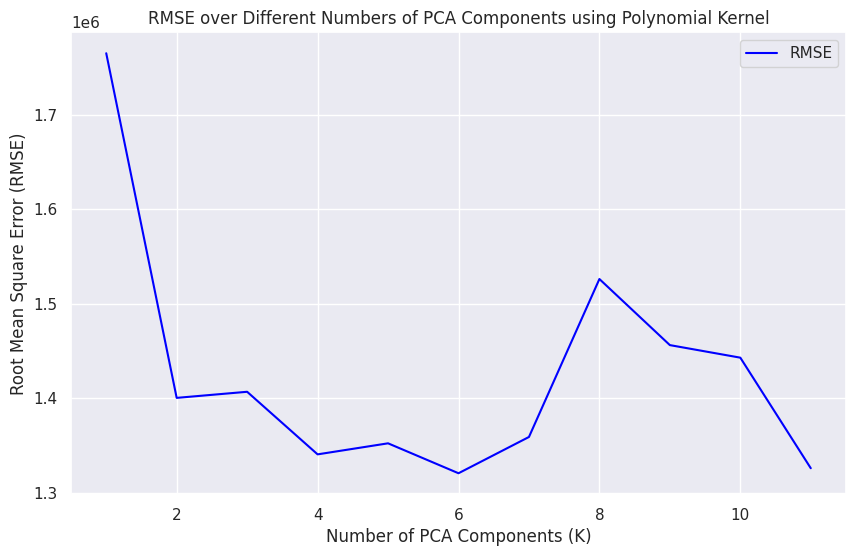

In [102]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


n = X_std.shape[1]  # Number of features in X_std
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None

# Loop over the number of principal components
for k in range(1, n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.20, random_state=0)

    # Fit the SVR model with a polynomial kernel
    svr_poly = SVR(kernel='poly', C=5e6, degree=2)
    svr_poly.fit(X_train, y_train.ravel())
    y_pred = svr_poly.predict(X_test)

    # Calculate RMSE and R^2 score
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)

    # Check for the best RMSE and corresponding R^2 and K
    if rmse < best_rmse:
        best_rmse, best_r2, best_k = rmse, r2, k

    # Print the RMSE and R^2 for each K
    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

# Output the best performance
print("\nPolynomial kernel")
print(f"Best K value is: {best_k}")
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2 (K={best_k}): {best_r2:.2f}')

# Plotting the RMSE over different values of K
plt.figure(figsize=(10, 6))
plt.plot(range(1, n), rmse_list, color='blue', label='RMSE')
plt.xlabel('Number of PCA Components (K)')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE over Different Numbers of PCA Components using Polynomial Kernel')
plt.legend()
plt.show()


K=1: RMSE = 1595919.61, R2 = 0.12
K=2: RMSE = 1305471.19, R2 = 0.41
K=3: RMSE = 1318173.01, R2 = 0.40
K=4: RMSE = 1291308.92, R2 = 0.42
K=5: RMSE = 1289024.80, R2 = 0.42
K=6: RMSE = 1122000.15, R2 = 0.56
K=7: RMSE = 1111893.80, R2 = 0.57
K=8: RMSE = 1129742.21, R2 = 0.56
K=9: RMSE = 1014164.73, R2 = 0.64
K=10: RMSE = 986947.09, R2 = 0.66
K=11: RMSE = 972404.91, R2 = 0.67

RBF kernel
Best K value is: 11
Best RMSE (K=11): 972404.91
Corresponding Best R2 (K=11): 0.67


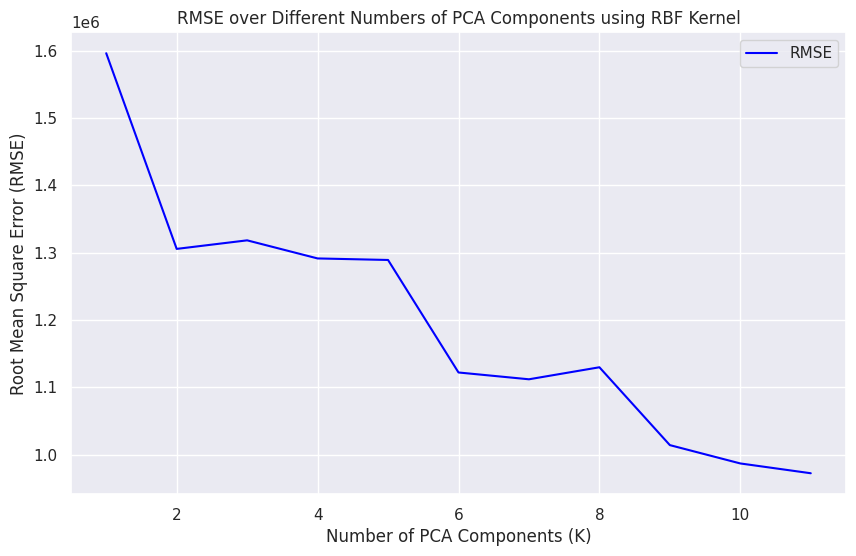

In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



n = X_std.shape[1]  # Number of features in X_std
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None

# Loop over possible numbers of principal components
for k in range(1, n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.20, random_state=0)

    # Fit the SVR model with an RBF kernel
    svr_rbf = SVR(kernel='rbf', C=3e6, gamma=0.1)
    svr_rbf.fit(X_train, y_train.ravel())
    y_pred = svr_rbf.predict(X_test)

    # Calculate RMSE and R^2 score
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)

    # Check for the best RMSE and corresponding R^2 and K
    if rmse < best_rmse:
        best_rmse, best_r2, best_k = rmse, r2, k

    # Print the RMSE and R^2 for each K
    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

# Output the best performance
print("\nRBF kernel")
print(f"Best K value is: {best_k}")
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2 (K={best_k}): {best_r2:.2f}')

# Plotting the RMSE over different values of K
plt.figure(figsize=(10, 6))
plt.plot(range(1, n), rmse_list, color='blue', label='RMSE')
plt.xlabel('Number of PCA Components (K)')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE over Different Numbers of PCA Components using RBF Kernel')
plt.legend()
plt.show()
